<a href="https://colab.research.google.com/github/liosvaldo/basic-neural-network-training/blob/main/mnist_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Atividade Treinamento da rede neural mnist 

1. Quantas camadas foram utilizadas? Houve alteração de desempenho aumentando ou diminuindo a quantidade de camadas?
R: Utilizamos 1 camada de entrada, 2 ocultas e a de saida. Tivemos um aumento no aprendizado até este tamanho. Logo em seguida tivemos um decaimento. 

2. Quantos neurônios em cada camada? Houve alteração de desempenho aumentando ou diminuindo a quantidade de camadas?
R: Utilizamos uma camada de entrada com 512 atributo e duas camadas ocultas com 216 e 64 atributos, todas com uma ativação modelo relu


3. Foi necessário utilizar técnicas de regularização?
Sim: Idealmente mantivemos apenas a Early Stopping, entretanto também foi testado a dropout. (Não sei se o checkpoint pode ser considerado uma técnica);

4. Qual a avaliação do modelo? Houve overfiting?
R: Com base nas técnicas utilizadas, observou-se overfiting que pode ser desconsideravel (Menor que 10 pontos)

5. Realize a leitura da base de teste e aplique o mesmo pré-processamento do treinamento (base seq_test). Houve alteração no desempenho na base de teste?
R: sim, tivemos uma queda de 0.02 pontos

6. Altere a dimensão dos dados de entrada (setados inicialmente com 150x150). Houve diferença no desempenho?
R: Não foi possível utilizar os dados de entrada desejados (150x150) tivemos um ouverflow da maquina. Utilizou-se (120x120). Entretanto, matematicamente falando, teremos uma redução de pixels na nossa imagem. Semelhantemente ao olho humano, uma maior dificuldade de identificar traços. Logo é previsivel que tenhamos uma queda no desempenho da rede.

7. [Desafio bônus]: Como está a distribuição das classes? Oversampling (data augmentation) melhoraria o desempenho desta base?
R: Não foi testado nenhum metodo deste tipo. Entretanto, vale lembrar que algumas classes tendem a ser bem parecidas. Logo seria interessante o data augmentation para atenuar essas semelhanças. 

Podemos observar esse tipo de dificuldade da rede em generalizar com base na matriz de confusão



#Import de dados

In [ ]:
import numpy as np 
import pandas as pd
import glob
import cv2
from tensorflow import keras
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from random import randint

##Import dados

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

##Visualização de dados

In [ ]:
def random_plots(X, y):
  f,ax = plt.subplots(5,5) 
  f.subplots_adjust(0,0,3,3)
  for i in range(0,5,1):
      for j in range(0,5,1):
          rnd_number = randint(0,len(X))
          ax[i,j].imshow(X[rnd_number])
          ax[i,j].set_title(y[rnd_number])
          ax[i,j].axis('off')


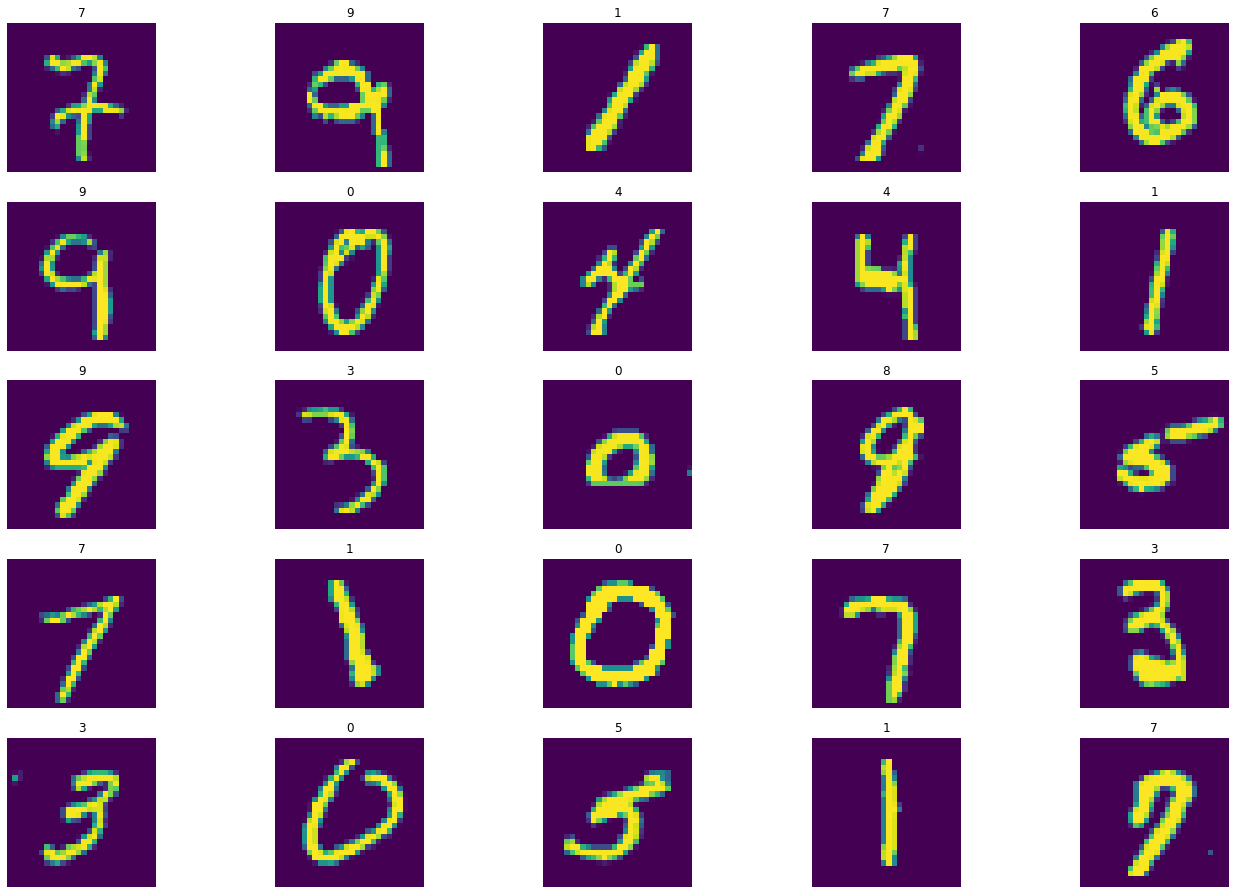

In [ ]:
random_plots(X_train,y_train)

##Separando a base de dados de treino em test e validação

In [ ]:
X_treino, X_val, y_treino, y_val = train_test_split(X_train,y_train, test_size=0.33,stratify=y_train, random_state=42)

In [ ]:
m = np.max(X_treino) # valor maximo de rgb

X_treino = X_treino/m
X_val = X_val/m

##Separando em classes

In [ ]:
oneHot = OneHotEncoder()

y_treino = oneHot.fit_transform(y_treino.reshape(-1,1)).toarray()
y_val = oneHot.fit_transform(y_val.reshape(-1,1)).toarray()
y_test = oneHot.fit_transform(y_test.reshape(-1,1)).toarray()

##Montando uma arquitetura

In [ ]:
from tensorflow.python.keras.layers import Input, Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
np.prod(X_treino.shape[1:])

784

In [ ]:
rede_numeros = Sequential()
rede_numeros.add(Flatten())
rede_numeros.add(Dense(512, input_dim=np.prod(X_treino.shape[1:])))
rede_numeros.add(Activation('relu'))
rede_numeros.add(Dense(256))
rede_numeros.add(Activation('relu'))
rede_numeros.add(Dense(64))
rede_numeros.add(Activation('relu'))
# rede_numeros.add(Dense(32))
# rede_numeros.add(Activation('relu'))
rede_numeros.add(Dense(10))
rede_numeros.add(Activation('softmax'))

In [ ]:
rede_numeros.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', 
                     metrics=['accuracy'])

In [ ]:
es = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

check = ModelCheckpoint(
    '/content/Pickle/pickle2.nav',
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode="auto",
    save_freq="epoch",
    options=None,
    initial_value_threshold=None,
)

historico = rede_numeros.fit(X_treino, 
                             y_treino, 
                             epochs = 50,
                             batch_size=64,
                             verbose = 1,
                             validation_data = (X_val, y_val),
                             callbacks=[es, check]
                             )

Epoch 1/50
629/629 [==============================] - 7s 10ms/step - loss: 0.2546 - accuracy: 0.9240 - val_loss: 0.1398 - val_accuracy: 0.9555

Epoch 00001: val_loss improved from inf to 0.13976, saving model to /content/Pickle/pickle2.nav
Epoch 2/50
629/629 [==============================] - 6s 10ms/step - loss: 0.0988 - accuracy: 0.9695 - val_loss: 0.1004 - val_accuracy: 0.9681

Epoch 00002: val_loss improved from 0.13976 to 0.10037, saving model to /content/Pickle/pickle2.nav
Epoch 3/50
629/629 [==============================] - 6s 10ms/step - loss: 0.0641 - accuracy: 0.9803 - val_loss: 0.1034 - val_accuracy: 0.9706

Epoch 00003: val_loss did not improve from 0.10037
Epoch 4/50
629/629 [==============================] - 6s 10ms/step - loss: 0.0445 - accuracy: 0.9858 - val_loss: 0.0851 - val_accuracy: 0.9752

Epoch 00004: val_loss improved from 0.10037 to 0.08512, saving model to /content/Pickle/pickle2.nav
Epoch 5/50
629/629 [==============================] - 6s 10ms/step - loss: 0.

##Analise de resultados

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_simples = rede_numeros.predict(X_val)

accuracy_score(y_val.argmax(1), pred_simples.argmax(1))

0.977020202020202

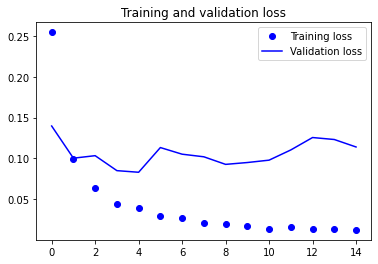

In [ ]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##Test

In [ ]:
pred_final = rede_numeros.predict(X_test)

accuracy_score(y_test.argmax(1), pred_final.argmax(1))

0.9753